In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [23]:
#loading dataset
dataset = pd.read_csv('balanced_new_columns.csv')

In [24]:
# Convert boolean columns to integers (True -> 1, False -> 0)
bool_columns = ['Has_Diabetes','Has_High_BP','Takes_Aspirin_Daily','Has_Heart_Disease','Has_Arthritis','Has_Arthritis_(Any_Form)','Has_Difficulty_Walking','Told_High_Blood_Chol','Advised_to_Reduce_Salt','Needs_Medical_Equipment','Told_to_Lose_Weight','Needs_Daily_Assistance_(Memory Loss)','Taking_Meds_for_BP','Has_Cataracts','Had_Pneumonia_Shot']
for col in bool_columns:
    dataset[col] = dataset[col].astype(int)

In [25]:
#picking features (x) and target variable (y)
x = dataset.drop('Has_Diabetes', axis=1)
y = dataset['Has_Diabetes'] 

#splitting data into test and training 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
#creating random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

#training the model
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
#make predictions on test set
y_pred = rf_model.predict(x_test)

#evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#printing the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy:\n{classification_rep}")

Accuracy: 0.7109035271380254
Confusion Matrix:
[[6033 3253]
 [2132 7209]]
Accuracy:
              precision    recall  f1-score   support

           0       0.74      0.65      0.69      9286
           1       0.69      0.77      0.73      9341

    accuracy                           0.71     18627
   macro avg       0.71      0.71      0.71     18627
weighted avg       0.71      0.71      0.71     18627



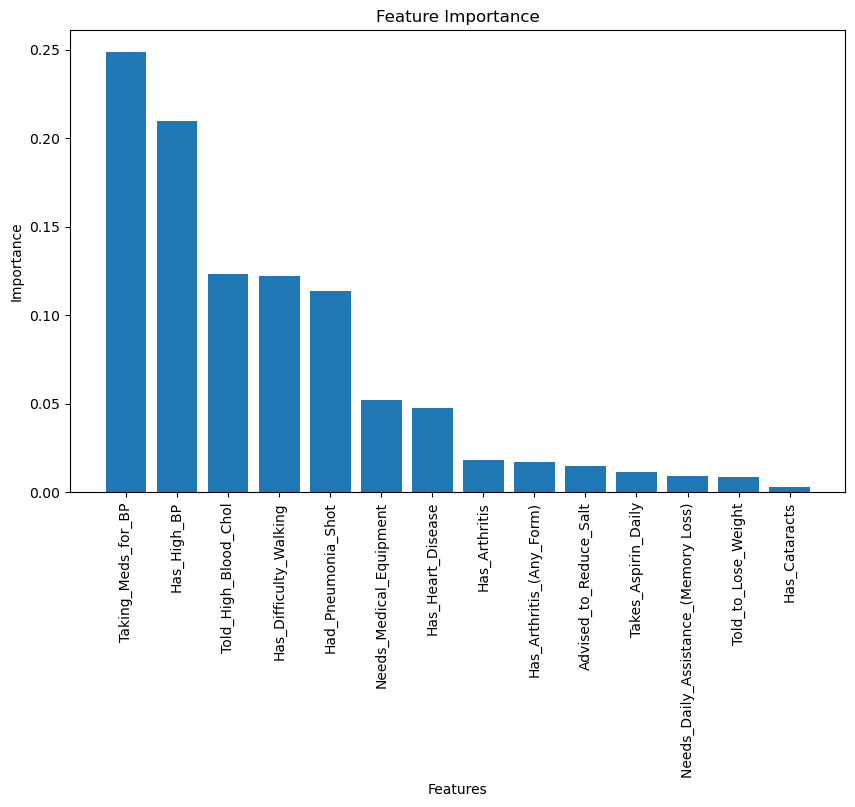

In [28]:
# Get feature importances
importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names based on feature importances
names = [x_train.columns[i] for i in indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(x_train.shape[1]), importances[indices])
plt.xticks(range(x_train.shape[1]), names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()